In [1]:
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
import torch
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)
model_name='/home/ubuntu/Mistral-7B-Instruct-v0.2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
        model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    trust_remote_code=True,
    quantization_config = bnb_config
    )
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer = tokenizer,
    torch_dtype=torch.bfloat16,
    device_map="auto", max_new_tokens=5
)
hf = HuggingFacePipeline(pipeline=pipe)

/home/ubuntu/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]


In [2]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
import os
prompt_template = ''' <s> [INST] You are an analytical tool specialized in processing and classifying GitHub Commit message. Your task is to assess developer's intent in a given commit message and categorize it into one of the following predefined categories based on its content:
                      
                      'Yes':  A commit messages that explicitly mentions performance improvement or optimization, specifically in terms of execution time or resource utilization. The message should clearly indicate actions that made the code runs faster or  more efficiently, use less memory, or more efficiently utilize system resources. Also, if a commit message describes a change made to address a performance bottleneck, prevent performance degradation, reduce overheads or solve a problem that negatively affects performance. This includes optimizations like replacing inefficient code patterns that are known to kill performance even if the message does not use the words 'improvement' or 'performance' explicitly.
                      'No': A commit message that do not pertain to performance enhancements. This includes messages related to code changes for testing, documentation, performance profiling/monitoring/debugging/analysis and bug/error/crash fixes that don't explicitly mention performance improvement of the application itself, code refactoring or feature addition without explicit performance optimization,  and mentions of necessary or speculative or potential performance enhancements without concrete evidence or results. Also, a messages that is irrelevant, unclear, or ambiguous, and those that do not provide enough context to determine their intent.     

                    If the commit message doesn't fit clearly into any of the above categories, classify it as: 'No'. Additionally, pay close attention to the context in which terms like 'performance', 'improve' or 'improvements' are used. Not all improvements are related to performance—only, classify a message as 'Yes' if it specifically mentions enhancements related to execution time, memory usage, or resource efficiency. Avoid making assumptions based on ambiguous terms. You should have high confidence in classifying a message as 'Yes' based on careful examination of the information provided in the commit message.
                    If you encounter a commit message with multiple intentions, where at least one of those intentions includes a performance improvement, classify the entire message as 'Yes'.
                    You will only respond with the predefined category. Do not include the word 'Category'. Do not provide explanations or notes.
                    
                    Commit message : ```{commit_message}``` [/INST] Model_answer:  </s> '''



prompt = PromptTemplate(
    input_variables=["commit_message"], template=prompt_template
)
llm = LLMChain(llm=hf, prompt=prompt)

In [ ]:
!pip install pandas

In [3]:
import pandas as pd

# Specify the path to your JSON file
json_file_path = '/home/ubuntu/data/train.jsonl'
file_test = '/home/ubuntu/data/test.jsonl'
# Read the JSON file into a Pandas DataFrame
df_train = pd.read_json(json_file_path, lines = True)

df_test = pd.read_json(file_test,lines=True)
print(df_train)

       idx                                     commit_message  target
0     2452  added timestamp in logfile, refactored xmpp co...       1
1     3666  [PATCH] Remove percpufication of in_flight cou...       1
2     4076  [PATCH] gauge_field::FloatNOrder can now use _...       1
3     2120  f2fs: support revoking atomic written pages  f...       1
4     2774  Refactoring.  Be more efficient. Don't do recu...       1
...    ...                                                ...     ...
2185  1218  [IMP] improve contract usability  bzr revid: [...       0
2186  1964  xspress3: added another IOC shell driver start...       0
2187  2573  Merge pull request #25 from pedrovitti/patch-1...       0
2188  1112  Reducing Memory consumption on start by not re...       0
2189  1195  Simplified shell scripts to extract cpu, os, v...       0

[2190 rows x 3 columns]


In [4]:


# Assuming df_train is already loaded and contains a target column named 'target'

# Define the range you're interested in
start_index = 1
end_index = 2180

# Filter df_train for the specified range before separating it based on the 'target' column
df_train_filtered = df_train.loc[start_index:end_index]

# Separate the filtered DataFrame into two based on the target column values
df_0 = df_train_filtered[df_train_filtered['target'] == 0]
df_1 = df_train_filtered[df_train_filtered['target'] == 1]

# Sample rows from each subset
# Note: Ensure there are at least 1000 rows in each filtered subset to avoid errors
min_count = min(len(df_0), len(df_1))
sample_0 = df_0.sample(n=min_count, random_state=42)
sample_1 = df_1.sample(n=min_count, random_state=42)

# Concatenate the two samples to get a balanced dataset
df_balanced_sample = pd.concat([sample_0, sample_1])

print(df_balanced_sample)




# # Assuming df_test is already loaded and contains a target column named 'target'

# # Separate the DataFrame into two based on the target column values
# df_0 = df_train[df_train['target'] == 0]
# df_1 = df_train[df_train['target'] == 1]

# # Calculate the minimum count to ensure equal number of 1s and 0s
# #min_count = min(len(df_0), len(df_1))

# # Sample min_count rows from each subset
# sample_0 = df_0.sample(n=1000, random_state=42)
# sample_1 = df_1.sample(n=1000, random_state=42)

# # Concatenate the two samples to get a balanced dataset
# df_balanced_sample = pd.concat([sample_0, sample_1])

# print(df_balanced_sample)


       idx                                     commit_message  target
1428    71  Issue #10115: Improve Serviceability of JaxRsF...       0
135   1511  usb: otg: Add dual-role device (DRD) support  ...       0
324    512  Fix pruning colab after [URL]/tensorflow/model...       0
1436   787  Fixed memory losses. Patch provide by wafro2. ...       0
1031  2344  Local music performance improvements and bugfixes       0
...    ...                                                ...     ...
1373  3628  mutex: Make more scalable by doing less atomic...       1
28    2702  Remove all OpenBSD/NetBSD code. It was the rig...       1
228   2767  Feature #8733: - improving performance about t...       1
557   3552  [C] changed PokemonNameCorrector#guessBestPoke...       1
437   2385  Update cordova-android to pick up i18n perform...       1

[1880 rows x 3 columns]


Now do predict with the llm

In [5]:
Predictions=[]
for i in df_balanced_sample['commit_message']:
    Predictions.append(llm.run(i))

/home/ubuntu/.local/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/home/ubuntu/.local/lib/python3.8/site-packages/transformers/pipelines/base.py:11

In [6]:
import re
df_balanced_sample['mistral_result']=Predictions
df_balanced_sample['mistral_result_cleaned']=df_balanced_sample['mistral_result'].apply(lambda x: re.search(r'\b(Yes|No)\b', x).group(0) if re.search(r'\b(Yes|No)\b', x) else None)

In [7]:
print(df_balanced_sample)

       idx                                     commit_message  target  \
1428    71  Issue #10115: Improve Serviceability of JaxRsF...       0   
135   1511  usb: otg: Add dual-role device (DRD) support  ...       0   
324    512  Fix pruning colab after [URL]/tensorflow/model...       0   
1436   787  Fixed memory losses. Patch provide by wafro2. ...       0   
1031  2344  Local music performance improvements and bugfixes       0   
...    ...                                                ...     ...   
1373  3628  mutex: Make more scalable by doing less atomic...       1   
28    2702  Remove all OpenBSD/NetBSD code. It was the rig...       1   
228   2767  Feature #8733: - improving performance about t...       1   
557   3552  [C] changed PokemonNameCorrector#guessBestPoke...       1   
437   2385  Update cordova-android to pick up i18n perform...       1   

     mistral_result mistral_result_cleaned  
1428       \n'No'.                      No  
135       \n'No'.                

In [8]:
df_balanced_sample['mistral_result_cleaned'].unique()

array(['No', 'Yes', None], dtype=object)

In [9]:
df_balanced_sample['mistral_target']=df_balanced_sample['mistral_result_cleaned'].replace('Yes',1).replace('No',0)

In [10]:
df_balanced_sample['mistral_target']

1428    0.0
135     0.0
324     0.0
1436    0.0
1031    0.0
       ... 
1373    1.0
28      0.0
228     1.0
557     1.0
437     1.0
Name: mistral_target, Length: 1880, dtype: float64

In [11]:
df_balanced_sample['mistral_target'].value_counts()

mistral_target
0.0    993
1.0    883
Name: count, dtype: int64

In [12]:
df_balanced_sample['mistral_target']=df_balanced_sample['mistral_target'].fillna(0)

In [ ]:
!pip install scikit-learn

In [13]:
from sklearn.metrics import classification_report

#y_true= df_balanced_sample['target']
#y_pred=df_balanced_sample['mistral_target']
y_true= df_balanced_sample[df_balanced_sample['mistral_target'].notnull()]['target']
y_pred=df_balanced_sample[df_balanced_sample['mistral_target'].notnull()]['mistral_target']

# Generate the classification report
report = classification_report(y_true, y_pred,output_dict=True)

# Print the classification report
print(report)


{'0': {'precision': 0.9077231695085256, 'recall': 0.9627659574468085, 'f1-score': 0.9344346928239545, 'support': 940.0}, '1': {'precision': 0.9603624009060022, 'recall': 0.902127659574468, 'f1-score': 0.9303346132748217, 'support': 940.0}, 'accuracy': 0.9324468085106383, 'macro avg': {'precision': 0.9340427852072639, 'recall': 0.9324468085106383, 'f1-score': 0.9323846530493881, 'support': 1880.0}, 'weighted avg': {'precision': 0.934042785207264, 'recall': 0.9324468085106383, 'f1-score': 0.9323846530493881, 'support': 1880.0}}


In [14]:
y_true.value_counts()


target
0    940
1    940
Name: count, dtype: int64

In [15]:
y_pred.value_counts()

mistral_target
0.0    997
1.0    883
Name: count, dtype: int64

In [ ]:
!pip install seaborn

In [ ]:
!pip install matplotlib

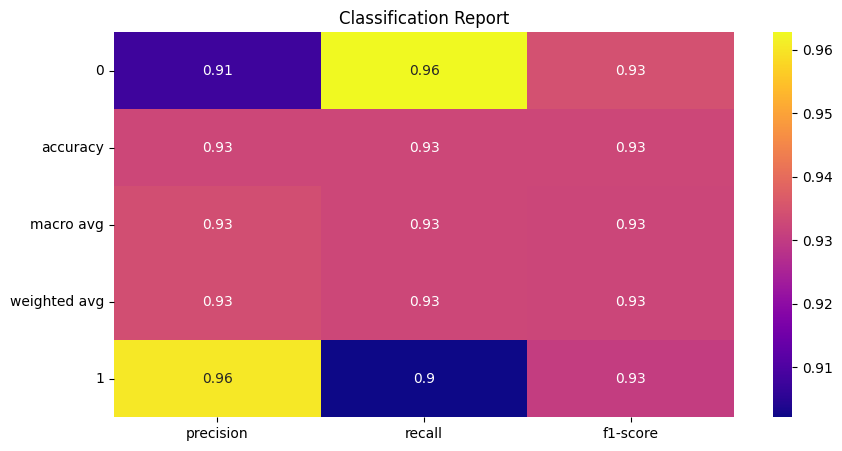

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.DataFrame(report).transpose()
df1 = df1.sort_values(by=['f1-score'], ascending=False)

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df1[['precision', 'recall', 'f1-score']], annot=True, cmap='plasma')
plt.title('Classification Report')
plt.show()

False Positives: 35
False Negatives: 92


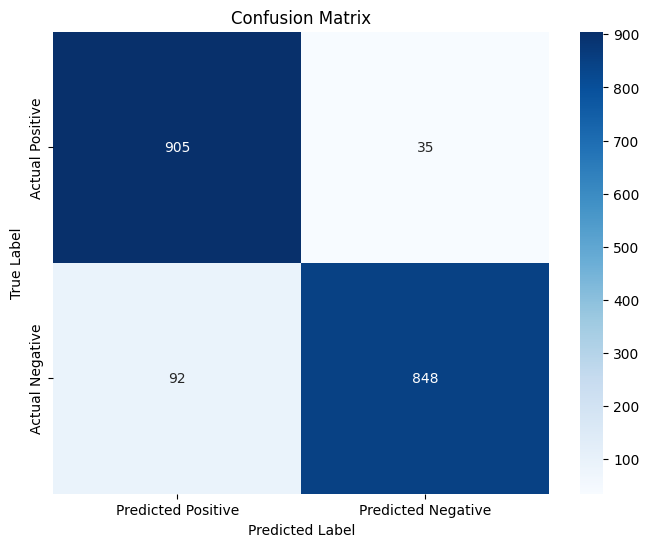

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Extract true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN)
tn, fp, fn, tp = cm.ravel()

# Calculate false positives and false negatives
false_positive = fp
false_negative = fn

print("False Positives:", false_positive)
print("False Negatives:", false_negative)
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

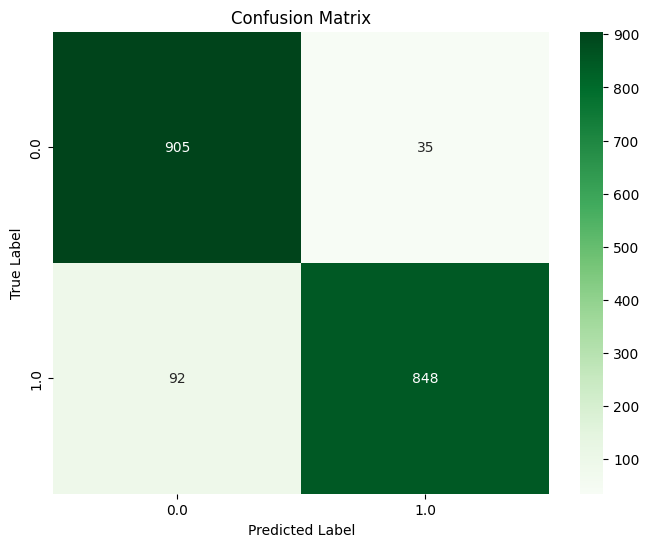

In [18]:
# Assuming y_true and y_pred are already defined as shown previously
import numpy as np
unique_labels = np.unique(np.concatenate((y_true, y_pred)))

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Plot the confusion matrix as a heatmap with unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=unique_labels, 
            yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We need to know the false positives and false negetives for tuning the model

In [19]:
pos = df_balanced_sample[ df_balanced_sample['mistral_target'] == 1]
pos

,idx,commit_message,target,mistral_result,mistral_result_cleaned,mistral_target
1564,1579,"-Fixed build.xml, to be able to run functional...",0,\n'Yes',Yes,1.0
1190,2212,workqueue: Replace pool->attach_mutex with glo...,0,\n'Yes',Yes,1.0
2047,3419,Use [URL] JSON format in results page [URL]/sh...,0,\n'Yes',Yes,1.0
1348,1205,working version of the Gauss-Seidel Preconditi...,0,\n'Yes',Yes,1.0
701,584,IB/hfi1: Fix an out-of-bounds access in get_hw...,0,\n'Yes',Yes,1.0
...,...,...,...,...,...,...
2079,3715,new append functionality/performance improveme...,1,\n'Yes',Yes,1.0
1373,3628,mutex: Make more scalable by doing less atomic...,1,\n'Yes',Yes,1.0
228,2767,Feature #8733: - improving performance about t...,1,\n'Yes',Yes,1.0
557,3552,[C] changed PokemonNameCorrector#guessBestPoke...,1,\n'Yes',Yes,1.0


In [22]:
fp = pos[pos['target'] == 0]
fp.to_csv('false_positive.csv', index=False)

In [23]:
pos = df_balanced_sample[ df_balanced_sample['mistral_target'] == 0]  #for false negetives
pos

,idx,commit_message,target,mistral_result,mistral_result_cleaned,mistral_target
1428,71,Issue #10115: Improve Serviceability of JaxRsF...,0,\n'No'.,No,0.0
135,1511,usb: otg: Add dual-role device (DRD) support ...,0,\n'No'.,No,0.0
324,512,Fix pruning colab after [URL]/tensorflow/model...,0,\n'No'.,No,0.0
1436,787,Fixed memory losses. Patch provide by wafro2. ...,0,\n'No'.,No,0.0
1031,2344,Local music performance improvements and bugfixes,0,\n'No'.,No,0.0
...,...,...,...,...,...,...
764,1478,ARM: 7877/1: use built-in byte swap function ...,1,\n'No'.,No,0.0
1360,4044,[PATCH] Removed Reaction-Field-nec\n\nThe RF n...,1,\n'No'.,No,0.0
1142,671,Basic 5th order implementation - only partly o...,1,\n'No'.,No,0.0
1281,3230,Register overutilization for arbitrary sequenc...,1,\n'No'.,No,0.0


In [24]:
fn = pos[pos['target'] == 1]
fn.to_csv('false_negetive.csv', index=False)

In [ ]:
# from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
# import torch
# # Specify the device for CUDA acceleration
# device = "cuda" # Or "cpu" if you're not using NVIDIA GPUs
# # Configuration for BitsAndBytes to optimize model loading
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True, # Enables loading the model in 4-bit precision
#     bnb_4bit_quant_type="nf4", # Specifies the quantization type
#     bnb_4bit_use_double_quant=True, # Enables double quantization for better precision
# )
# # Loading the tokenizer
# tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
# # Loading the model with BitsAndBytes configuration, and additional settings from Method-1
# model = AutoModelForCausalLM.from_pretrained(
#     "mistralai/Mistral-7B-Instruct-v0.2",
#     torch_dtype=torch.float16, # Sets the tensor type to float16 for faster computation
#     device_map="auto", # Automatically maps the model layers to the available devices
#     trust_remote_code=True, # Allows the execution of remote code for custom model configurations
#     attn_implementation="flash_attention_2", # Uses a specific attention implementation optimized for performance
#     _config=bnb_config, # Applies the BitsAndBytes configuration
# )
# # Move the model to the specified device
# model.to(device)
# # Prepare the messages for encoding
# messages = [
#     {"role": "user", "content": "What is your favourite condiment?"},
#     {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
#     {"role": "user", "content": "Do you have mayonnaise recipes?"}
# ]
# # Encode the messages using the tokenizer
# encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt").to(device)
# # Generate responses using the model
# generated_ids = model.generate(encodeds, max_new_tokens=5, do_sample=True)
# decoded = tokenizer.batch_decode(generated_ids)
# # Print the generated response
# print(decoded[0])